In [1]:
from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display

In [2]:
%matplotlib inline

In [3]:
flynumbers = list(range(1389,1402))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
fly.open_signals()

In [4]:
sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii1'),('right', 'iii1'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'hg2'),('right', 'hg2'),
            ('left', 'hg3'),('right', 'hg3'),
            ('left', 'hg4'),('right', 'hg4'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]
for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]

In [5]:
state_mtrx = np.vstack([fly.spikestates[key] for key in sorted_keys])

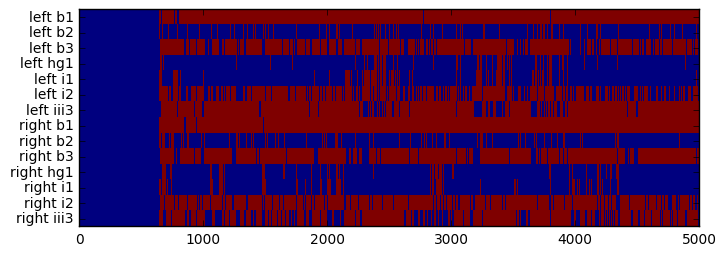

In [28]:
plt.figure(figsize = (8,2.8))
plt.imshow(state_mtrx[:,0:5000],aspect = 'auto',interpolation = 'nearest')
plt.gca().set_yticks(range(14))
lbs = plt.gca().set_yticklabels(['%s %s'%k for k in sorted_keys])   

In [246]:
from sklearn.cluster import AffinityPropagation,DBSCAN,AgglomerativeClustering,KMeans

In [297]:
ds = DBSCAN(min_samples = 10,eps = 0.00001).fit(mtrx_chunk.T)
n_clusters_ds = len(set(ds.labels_))
labels = ds.labels_

centers = [np.mean(mtrx_chunk[:,labels == l],axis = 1) for l in list(set(labels))]

centers = np.array(centers)

In [300]:
np.shape(centers)

(138, 14)

In [301]:
#af = AffinityPropagation(damping=0.9).fit(X_embedded)
#ac = AgglomerativeClustering(n_clusters = n_clusters_ds).fit(mtrx_chunk.T)
km = KMeans(n_clusters = np.shape(centers)[0],init=centers).fit(mtrx_chunk.T)
#cluster_centers_indices = af.cluster_centers_indices_
labels = km.labels_
#labels = ac.labels_

#n_clusters_ac = ac.n_clusters
n_clusters_km = km.n_clusters

In [302]:
from itertools import cycle

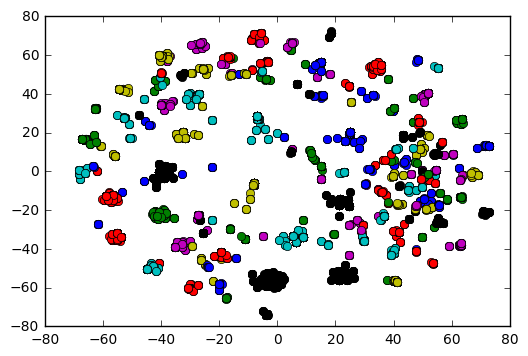

In [303]:
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_km), colors):
    class_members = labels == k
    #cluster_center = X_embedded[cluster_centers_indices[k]]
    plt.plot(X_embedded[class_members, 0], X_embedded[class_members, 1], col + 'o')

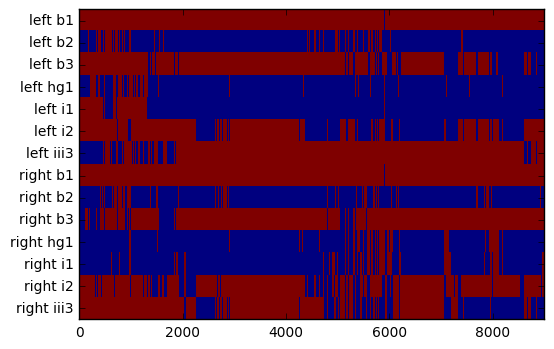

In [94]:
plt.imshow(mtrx_chunk[:,np.argsort(X_embedded[:,0])],aspect = 'auto',interpolation = 'nearest')
plt.gca().set_yticks(range(14))
lbs = plt.gca().set_yticklabels(['%s %s'%k for k in sorted_keys])

In [982]:
from sklearn.manifold import SpectralEmbedding,MDS,LocallyLinearEmbedding

In [954]:
#key = ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0')
key = ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0')
idx_list = fly.block_data[key]
#key = ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0')
#idx_list = np.vstack((idx_list,fly.block_data[key]))
#key = ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0')
#idx_list = np.vstack((idx_list,fly.block_data[key]))

In [ ]:
for fly in flylist:
    

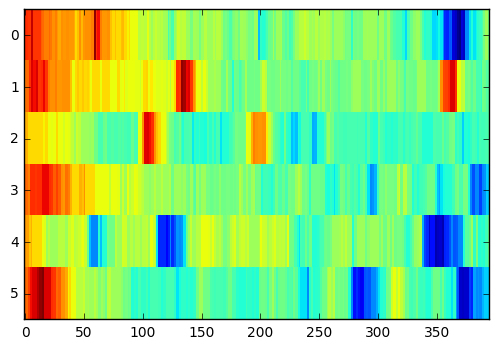

In [955]:
plt.imshow(np.hstack([np.array(fly.left_amp)[idx] for idx in idx_list]).T,
           aspect = 'auto', interpolation = 'nearest')

In [956]:
mtrx_list = []
for idx in idx_list:
    chunk = state_mtrx[:,idx]
    mtrx_list.append(np.vstack((chunk[:,:-1],chunk[:,1:])))
trans_chunk = np.hstack(mtrx_list)

In [957]:
lmr = np.squeeze([(np.array(fly.left_amp)[idx] - \
                  np.array(fly.right_amp)[idx])[:-1] for idx in idx_list])

In [958]:
lmr = np.hstack(lmr)

In [959]:
print np.shape(lmr)

(2364,)


In [960]:
#mtrx_chunk = state_mtrx[:,5000:6000]
#trans_chunk = np.vstack((mtrx_chunk[:,:-1],mtrx_chunk[:,1:]))

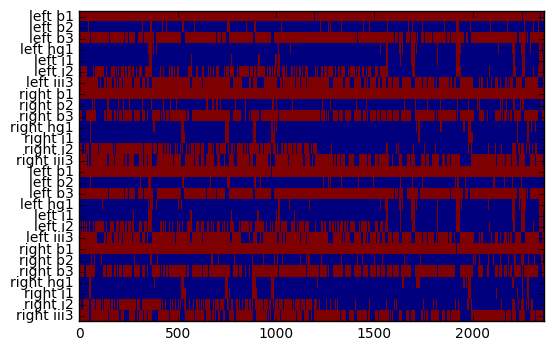

In [961]:
plt.imshow(trans_chunk,aspect = 'auto',interpolation = 'nearest')
plt.gca().set_yticks(range(14*2))
lbs = plt.gca().set_yticklabels(['%s %s'%k for k in sorted_keys+sorted_keys])  

In [962]:
mask = (np.sum(trans_chunk[:14,:] == trans_chunk[14:,:],axis= 0) > 12)

In [1005]:
def dist(r1,r2):
    p1 = 1-0.5**np.sum(~(r1.astype(bool) == r2.astype(bool)))
    return p1

In [964]:
lmr_c = lmr - np.nanmin(lmr)#,10)
lmr_c /= np.nanmax(lmr_c)#,90)

In [1013]:
X_embedded = TSNE(metric=dist,n_components=2).fit_transform(trans_chunk.T)
#X_embedded = Isomap(n_components=1).fit_transform(trans_chunk.T[~mask,:])
#X_embedded = SpectralEmbedding(n_jobs=-1,n_components=1).fit_transform(trans_chunk.T[~mask,:])
#X_embedded = MDS(n_jobs=-1,
#                 n_components=1,
#                 metric = True,
#                 dissimilarity = 'precomputed').fit_transform(dis_sim)
#X_embedded = LocallyLinearEmbedding(n_components=2,).fit_transform(trans_chunk.T)

In [1014]:
np.shape(trans_chunk)

(28, 2364)

In [1015]:
dis_sim = np.zeros((np.shape(trans_chunk)[1],
                   np.shape(trans_chunk)[1]))

In [1006]:
for i in range(np.shape(trans_chunk)[1]):
    for j in range(np.shape(trans_chunk)[1]):
        dis_sim[i,j] = dist(trans_chunk[:,i],trans_chunk[:,j])

In [1011]:
af = AffinityPropagation(damping=0.9,affinity='precomputed').fit(dis_sim)
n_clusters_af = len(set(af.labels_))
labels = af.labels_

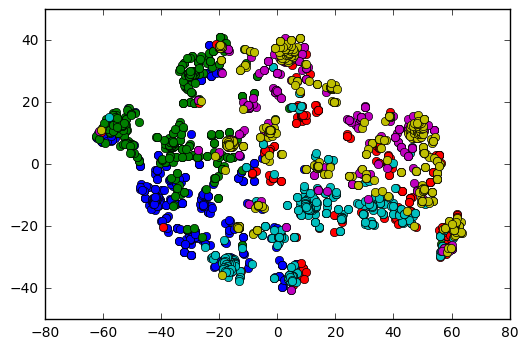

In [1016]:
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_af), colors):
    class_members = labels == k
    #cluster_center = X_embedded[cluster_centers_indices[k]]
    plt.plot(X_embedded[class_members, 0], X_embedded[class_members, 1], col + 'o')

In [654]:
ds = DBSCAN(min_samples = 10,eps = 0.001).fit(trans_chunk.T)

In [692]:
ds = DBSCAN(min_samples = 10,eps = 2.9).fit(X_embedded)
n_clusters_ds = len(set(ds.labels_))
labels = ds.labels_

#centers = [np.mean(mtrx_chunk[:,labels == l],axis = 1) for l in list(set(labels))]

#centers = np.array(centers)

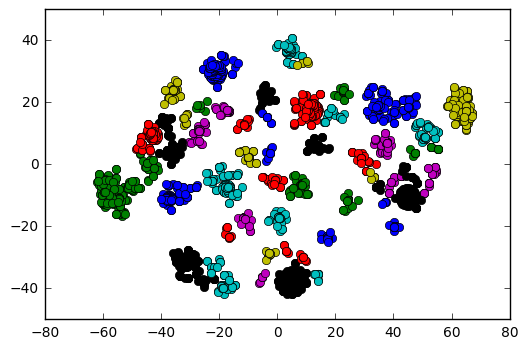

In [693]:
#plt.scatter(X_embedded[:,0],X_embedded[:,1])
colors = cycle('bgrcmyk')
#colors = cycle('r')
for k, col in zip(range(n_clusters_ds), colors):
    class_members = labels == k
    #cluster_center = X_embedded[cluster_centers_indices[k]]
    plt.plot(X_embedded[class_members, 0], X_embedded[class_members, 1], col + 'o')

In [709]:
lbl_set = np.array(list(set(labels)))
n_members = np.zeros_like(lbl_set)
for i,l in enumerate(lbl_set):
    n_members[i] = np.sum(labels == l)

In [716]:
sorted_labels = [x for _,x in sorted(zip(n_members,lbl_set))[::-1]]

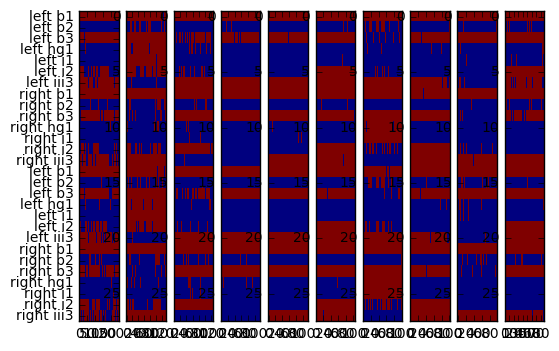

In [721]:
plt.subplot(1,10,1)
plt.gca().set_yticks(range(14*2))
lbs = plt.gca().set_yticklabels(['%s %s'%k for k in sorted_keys+sorted_keys])
for i,lbl in enumerate(sorted_labels[:10]):
    plt.subplot(1,10,i+1)
    class_members = labels == lbl
    #print np.sum(class_members)
    plt.imshow(trans_chunk[:,class_members],
               aspect = 'auto',interpolation = 'nearest')

In [528]:
lmr = fly.left_amp[5001:6000]-fly.right_amp[5001:6000]
lmr[~np.isreal(lmr)] = 0
lmr[np.isinf(lmr)] = 0
lmr[np.isnan(lmr)] = 0
lmr_c = lmr - np.min(lmr)
lmr_c /= np.max(lmr_c)

In [529]:
print np.shape(lmr_c)
print np.shape(X_embedded)
c = np.squeeze(plt.cm.jet(lmr_c))

(999, 1)
(999, 1)
